In [1]:
import pandas as pd

input_file = "/Users/szymontrochimiak/Library/CloudStorage/CloudMounter-SzymonTrochimiak/Nauka/PW/MINI/Data Processing in R and Python/Data/bitcoin.stackexchange.com/Posts.xml"

In [2]:
df_posts = pd.read_xml(input_file)

In [5]:
df_posts

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,LastActivityDate,...,AnswerCount,CommentCount,ContentLicense,AcceptedAnswerId,FavoriteCount,ClosedDate,ParentId,LastEditorDisplayName,CommunityOwnedDate,OwnerDisplayName
0,1,1,2011-08-30T21:12:34.090,29,39281.0,<p>What open source miner applications are the...,12.0,5406.0,2016-01-21T15:10:59.710,2021-12-09T17:45:19.383,...,10.0,1,CC BY-SA 3.0,NaN,NaN,None,NaN,None,None,None
1,2,1,2011-08-30T21:14:50.327,9,5173.0,"<p>GPU mining is the way to go, as at August 2...",16.0,5406.0,2016-01-21T15:15:41.977,2016-01-21T15:15:41.977,...,5.0,3,CC BY-SA 3.0,15.0,0.0,2014-08-10T23:28:43.510,NaN,None,None,None
2,3,1,2011-08-30T21:14:52.000,7,3783.0,<p>We all know that mining is supposed to keep...,9.0,5406.0,2016-01-20T21:08:13.797,2016-01-20T21:08:13.797,...,4.0,4,CC BY-SA 3.0,NaN,NaN,2011-08-31T02:21:39.493,NaN,None,None,None
3,4,2,2011-08-30T21:17:45.367,20,NaN,"<p>The official list is on <a href=""https://en...",22.0,-1.0,2015-07-28T08:25:34.603,2015-07-28T08:25:34.603,...,NaN,3,CC BY-SA 3.0,NaN,NaN,None,1.0,None,None,None
4,5,2,2011-08-30T21:18:00.607,2,NaN,"<p><a href=""https://bitcointalk.org/index.php?...",9.0,NaN,None,2011-08-30T21:18:00.607,...,NaN,0,CC BY-SA 3.0,NaN,NaN,None,1.0,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73908,120735,1,2023-12-02T11:53:42.130,0,11.0,<p>I have a scenario:\nUserA (<strong>bc1pmd3t...,146596.0,101498.0,2023-12-02T11:56:17.107,2023-12-02T11:56:17.107,...,0.0,0,CC BY-SA 4.0,NaN,NaN,None,NaN,None,None,None
73909,120738,1,2023-12-02T23:18:02.723,0,9.0,<p>My Debug.log shows</p>\n<p><br>2023-10-27 0...,121859.0,NaN,None,2023-12-02T23:18:02.723,...,0.0,0,CC BY-SA 4.0,NaN,NaN,None,NaN,None,None,None
73910,120739,1,2023-12-03T01:08:35.137,0,6.0,<p>My understanding of a multi-vendor multisig...,111449.0,NaN,None,2023-12-03T01:08:35.137,...,0.0,0,CC BY-SA 4.0,NaN,NaN,None,NaN,None,None,None
73911,120740,1,2023-12-03T02:25:18.487,0,8.0,<p>I apologize if this question does not make ...,146606.0,NaN,None,2023-12-03T02:25:18.487,...,0.0,1,CC BY-SA 4.0,NaN,NaN,None,NaN,None,None,None


In [8]:
df_posts["CreationDate"] = pd.to_datetime(df_posts["CreationDate"])
df_posts["LastActivityDate"] = pd.to_datetime(df_posts["LastActivityDate"])
df_posts["LastEditDate"] = pd.to_datetime(df_posts["LastEditDate"])
df_posts["ClosedDate"] = pd.to_datetime(df_posts["ClosedDate"])
df_posts["CommunityOwnedDate"] = pd.to_datetime(df_posts["CommunityOwnedDate"])

In [27]:
questions = df_posts[df_posts["PostTypeId"]==1]
answers = df_posts[df_posts["PostTypeId"]==2]

<Axes: xlabel='CreationDate'>

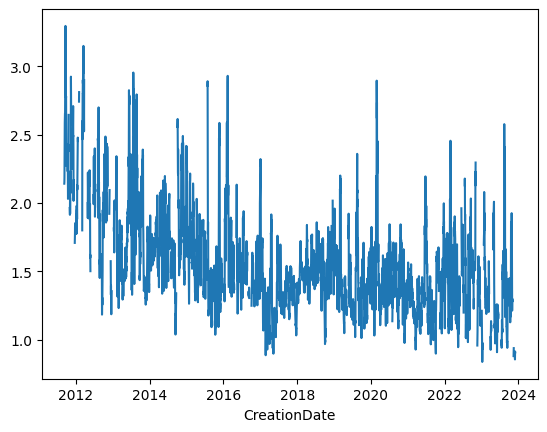

In [33]:
(answers.groupby(df_posts["CreationDate"].dt.date).size() / questions.groupby(df_posts["CreationDate"].dt.date).size()).rolling(window=10).mean().plot()
#answers.groupby(df_posts["CreationDate"].dt.date).size().rolling(window=10).mean().plot()

/var/folders/v3/x_ps6wr13g52vv22zxx8c_fr0000gn/T/ipykernel_6633/4137211113.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  questions_after_2012 = questions[questions["CreationDate"].dt.year>=2012][questions["CreationDate"].dt.year<2023]


<Axes: xlabel='CreationDate'>

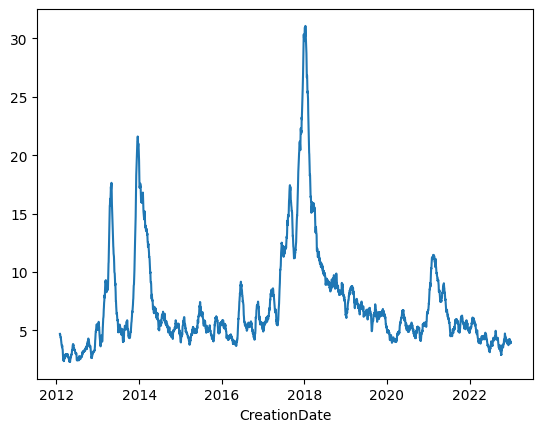

In [25]:
questions_after_2012 = questions[questions["CreationDate"].dt.year>=2012][questions["CreationDate"].dt.year<2023]
questions_after_2012.groupby(df_posts["CreationDate"].dt.date).size().rolling(window=30).mean().plot()

In [24]:
questions_on_2018 = questions[questions["CreationDate"].dt.year==2017][questions["CreationDate"].dt.month==12][ questions["CreationDate"].dt.day==17]
questions_on_2018

/var/folders/v3/x_ps6wr13g52vv22zxx8c_fr0000gn/T/ipykernel_6633/1536041687.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  questions_on_2018 = questions[questions["CreationDate"].dt.year==2017][questions["CreationDate"].dt.month==12][ questions["CreationDate"].dt.day==17]
/var/folders/v3/x_ps6wr13g52vv22zxx8c_fr0000gn/T/ipykernel_6633/1536041687.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  questions_on_2018 = questions[questions["CreationDate"].dt.year==2017][questions["CreationDate"].dt.month==12][ questions["CreationDate"].dt.day==17]


,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,LastActivityDate,...,AnswerCount,CommentCount,ContentLicense,AcceptedAnswerId,FavoriteCount,ClosedDate,ParentId,LastEditorDisplayName,CommunityOwnedDate,OwnerDisplayName
40469,65501,1,2017-12-17 00:05:14.647,2,462.0,<p>I'm working on installing Bitcoin Core for ...,69347.0,NaN,NaT,2018-03-11 22:31:02.847,...,2.0,3,CC BY-SA 3.0,NaN,NaN,NaT,NaN,None,NaT,None
40470,65502,1,2017-12-17 00:13:51.867,0,182.0,"<p>:( Hi I need some help, I ordered some bit ...",69351.0,63569.0,2017-12-17 05:49:33.147,2017-12-17 05:49:33.147,...,1.0,0,CC BY-SA 3.0,NaN,NaN,2017-12-18 21:46:30.227,NaN,None,NaT,None
40471,65509,1,2017-12-17 01:06:23.777,0,1423.0,<p>Is there a way to mine your own transaction...,69356.0,NaN,NaT,2017-12-17 01:15:37.773,...,1.0,0,CC BY-SA 3.0,NaN,NaN,2017-12-18 10:15:16.637,NaN,None,NaT,None
40473,65511,1,2017-12-17 01:11:43.260,3,839.0,<p>I'm trying to find the balance of specific ...,69359.0,63872.0,2017-12-21 22:14:02.893,2017-12-21 22:14:02.893,...,1.0,0,CC BY-SA 3.0,65520.0,NaN,NaT,NaN,None,NaT,None
40474,65512,1,2017-12-17 01:12:14.537,1,4841.0,<p>I have 2 AntMiner S9's running. Each of the...,69358.0,NaN,NaT,2018-03-17 22:11:02.823,...,1.0,2,CC BY-SA 3.0,66177.0,NaN,NaT,NaN,None,NaT,None
40479,65524,1,2017-12-17 04:44:51.373,1,2479.0,<p>How I can send bitcoins to someone's phone ...,69387.0,9822.0,2017-12-17 04:58:17.057,2020-07-11 00:03:58.823,...,1.0,0,CC BY-SA 3.0,NaN,NaN,NaT,NaN,None,NaT,None
40481,65528,1,2017-12-17 05:18:30.960,0,127.0,<h1>Is there an easier/alternative route to go...,65762.0,-1.0,2020-06-16 11:10:03.350,2017-12-17 05:18:30.960,...,0.0,2,CC BY-SA 3.0,NaN,NaN,NaT,NaN,None,NaT,None
40482,65531,1,2017-12-17 06:26:32.757,5,1931.0,<p>I was using Bitfinex until they stopped all...,47999.0,51005.0,2017-12-24 23:12:44.057,2018-12-22 20:00:36.440,...,1.0,2,CC BY-SA 3.0,NaN,NaN,NaT,NaN,None,NaT,None
40483,65532,1,2017-12-17 06:32:11.980,0,2687.0,<p>I am trying to solo-mine CANN using my Antm...,69400.0,5757.0,2018-01-20 15:34:03.677,2023-11-28 07:04:30.613,...,1.0,2,CC BY-SA 3.0,NaN,NaN,NaT,NaN,None,NaT,None
40485,65536,1,2017-12-17 08:48:43.767,-1,176.0,<p>What are some recent scaling proposals wort...,52806.0,52806.0,2017-12-17 08:49:58.687,2021-04-22 06:05:55.647,...,2.0,0,CC BY-SA 3.0,NaN,NaN,NaT,NaN,None,NaT,None


<Axes: xlabel='CreationDate'>

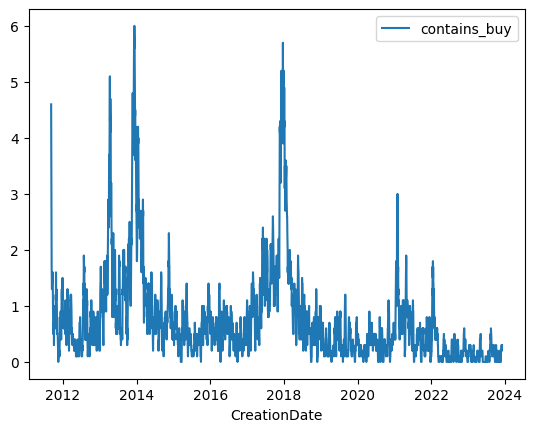

In [34]:
df_posts['contains_buy'] = df_posts['Body'].str.contains('buy', case=False, na=False)
df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_buy': 'sum'}).rolling(window=10).mean().plot()

<Axes: xlabel='CreationDate'>

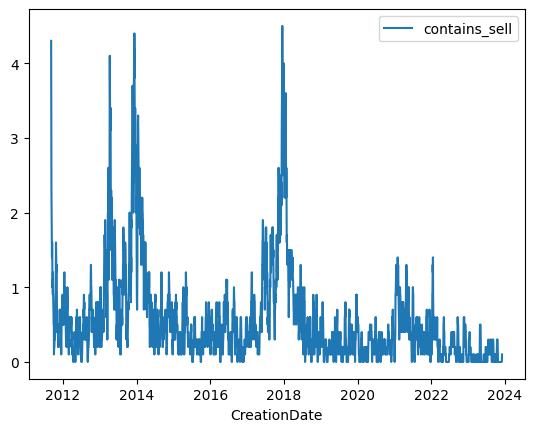

In [37]:
df_posts['contains_sell'] = df_posts['Body'].str.contains('sell', case=False, na=False)
df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_sell': 'sum'}).rolling(window=10).mean().plot()

<Axes: xlabel='CreationDate'>

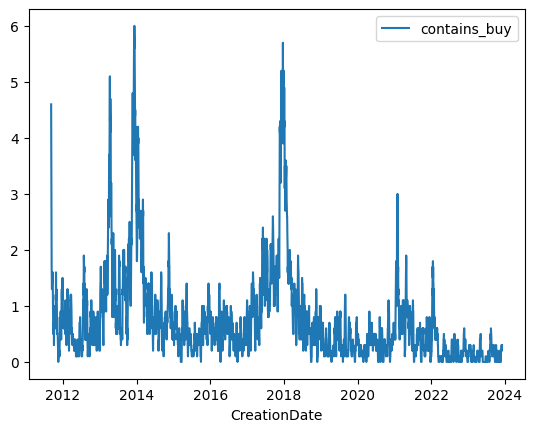

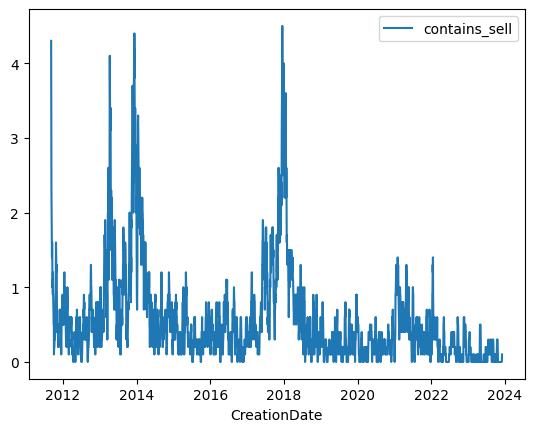

In [38]:
df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_buy': 'sum'}).rolling(window=10).mean().plot()
df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_sell': 'sum'}).rolling(window=10).mean().plot()

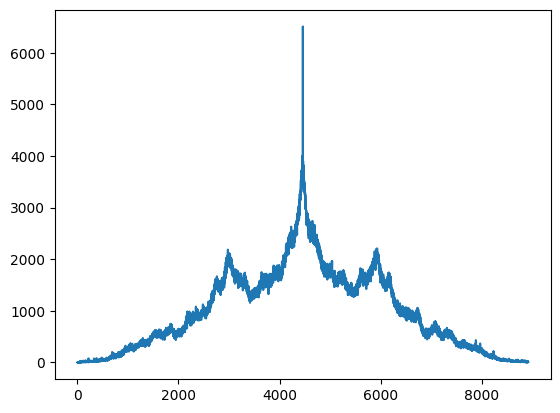

0

In [44]:
buy = df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_buy': 'sum'})
sell = df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_sell': 'sum'})

from scipy.signal import correlate
import matplotlib.pyplot as plt
import numpy as np

xcorr = correlate(buy, sell, mode='full', method='auto')
plt.plot(xcorr)
plt.show()

# The shift is determined by the index of the maximum correlation
max_corr_index = np.argmax(xcorr)
shift = max_corr_index - (len(buy) - 1)
shift

<Axes: xlabel='CreationDate'>

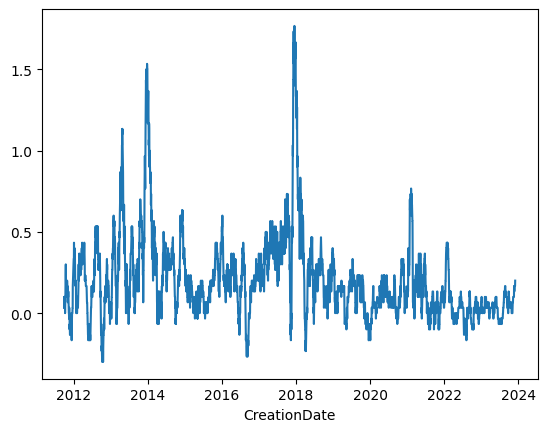

In [51]:
(buy["contains_buy"]-sell["contains_sell"]).rolling(window=30).mean().plot()

In [53]:
all_posts = df_posts.groupby(df_posts["CreationDate"].dt.date).size()
all_posts

CreationDate
2011-08-30    158
2011-08-31    149
2011-09-01     77
2011-09-02     66
2011-09-03     54
             ... 
2023-11-29      9
2023-11-30      7
2023-12-01      7
2023-12-02      5
2023-12-03      3
Length: 4461, dtype: int64

<Axes: xlabel='CreationDate'>

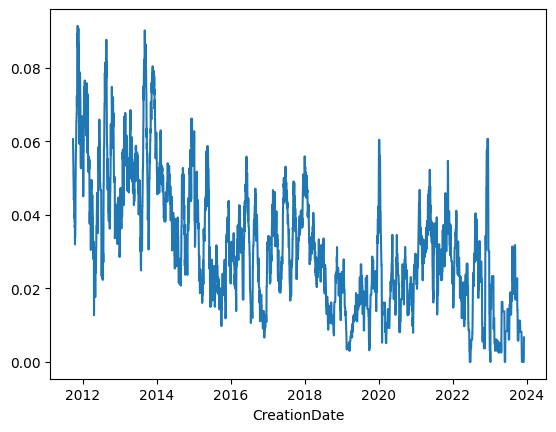

In [58]:
(sell["contains_sell"] / all_posts).rolling(window=30).mean().plot()

In [59]:
buy["contains_buy"].corr(sell["contains_sell"])

0.7153840347068489

In [71]:
import datetime
start_date = datetime.date.fromisoformat("2017-01-01")
end_date = datetime.date.fromisoformat("2019-01-01")
buy.loc[start_date:end_date]

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Index([2011-08-30, 2011-08-31, 2011-09-01, 2011-09-02, 2011-09-03, 2011-09-04,
       2011-09-05, 2011-09-06, 2011-09-07, 2011-09-08,
       ...
       2023-11-24, 2023-11-25, 2023-11-26, 2023-11-27, 2023-11-28, 2023-11-29,
       2023-11-30, 2023-12-01, 2023-12-02, 2023-12-03],
      dtype='object', name='CreationDate', length=4461)